# Workshop 1 Activate Review

In this workshop we will be reviewing what we learned during Activate and putting it into practice.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In this workshop we will be using some data from a popular online content creator called Mr Feast. On his channel he uploads regular videos across a variety of categories.

You can check the metadata for this dataset below:

<table>
    <tr>
        <th>Field</th>
        <th>Description</th>
        <th>Data Type</th>
    </tr>
    <tr>
        <td>video_id</td>
        <td>Unique id for the video</td>
        <td>object</td>
    </tr>
    <tr>
        <td>category</td>
        <td>Video genre</td>
        <td>object</td>
    </tr>
    <tr>
        <td>views</td>
        <td>Total cumulative views since release</td>
        <td>float</td>
    </tr>
    <tr>
        <td>days_since_release</td>
        <td>Time (in days) since video was release</td>
        <td>integer</td>
    </tr>
    <tr>
        <td>License</td>
        <td>What type of license the video comes under</td>
        <td>object</td>
    </tr>
    <tr>
        <td>views_change</td>
        <td>Number of new views video has received that day</td>
        <td>float</td>
    </tr>
</table>

In [29]:
# Load in the data

feast=pd.read_csv('data/mr_feast_views.csv')

feast.head()

,video_id,category,views,days_since_release,License,views_change
0,VG916,Reaction,2108373.0,27,NaN,2108373.0
1,VG916,Reaction,2108373.0,27,NaN,2108373.0
2,VG916,Reaction,2543481.0,28,NaN,435108.0
3,VG916,Reaction,3084828.0,29,NaN,541347.0
4,VG916,Reaction,3784331.0,30,NaN,699503.0


# Inspect and clean the data

Whenever we receive a new dataset we should always inspect it. We are checking for any required cleaning, and also to understand what is going on in the dataset.

In [31]:
# Check how many rows and columns the data has

feast.shape

(396, 6)

In [32]:
# Check for duplicates

feast.duplicated().sum()

39

In [33]:
# drop any duplicate rows we find

feast=feast.drop_duplicates()

In [34]:
# Check for nulls

feast.isna().sum()

video_id                0
category                0
views                   0
days_since_release      0
License               357
views_change            0
dtype: int64

In [35]:
# Since the License column is entirely filled with nulls, the optimal step is to drop this column

feast=feast.drop('License',axis=1)

In [36]:
# Check the shape again to see how many rows and columns we are left with

feast.shape

(357, 5)

# Exploratory Data Analysis

Now we have cleaned our data we can move onto analysing it to get some more insights. A useful way to do this is through grouping the data together.

As a reminder from Activate, to group data together we use `.groupby()`, stating on which column(s) we would like to group. We also need to provide an aggregate (e.g. mean, max, median, etc).

In this demonstration we will group the data by video category to compare the daily views each gets.

In [9]:
# In this dataset the views column is cumulative
# If we want to look at views per day, we need to look at views_change

# Calculate mean daily views

feast.groupby('category').mean()[['views_change']]

,views_change
category,
Advert,3900.363636
Challenge,659760.444444
Reaction,498177.147783
Vlog,125602.428571


Note, this method can be inefficient as we are asking python to calculate the mean for each feature, then print the column we want.

What is more efficient is to call the column we want first:

In [38]:
feast.groupby('category')[['views_change']].mean()

,views_change
category,
Advert,3900.363636
Challenge,659760.444444
Reaction,498177.147783
Vlog,125602.428571


In [10]:
# Calculate max views

feast.groupby('category')[['views_change']].max()

,views_change
category,
Advert,27082.0
Challenge,2355802.0
Reaction,2295875.0
Vlog,813641.0


In [11]:
# Calculate median daily views

feast.groupby('category')[['views_change']].median()

,views_change
category,
Advert,393.0
Challenge,590523.0
Reaction,361904.0
Vlog,39825.0


In [12]:
# Calculate the standard deviation of the daily views

feast.groupby('category')[['views_change']].std()

,views_change
category,
Advert,8690.569093
Challenge,695632.548171
Reaction,601057.880954
Vlog,249437.979269


In [13]:
# Instead of calculating each measure individually, we can use .agg and then state what aggregates we want:

feast.groupby('category')[['views_change']].agg(['mean','max','median','std'])

views_change                                    
                    mean        max    median            std
category                                                    
Advert       3900.363636    27082.0     393.0    8690.569093
Challenge  659760.444444  2355802.0  590523.0  695632.548171
Reaction   498177.147783  2295875.0  361904.0  601057.880954
Vlog       125602.428571   813641.0   39825.0  249437.979269

Another useful way to examine our data is to look at how our data is distributed. This allows us to identify the range of the data, as well as check for features such as normality.

To examine distribution we plot a histogram, the code below allows us to see the distribution of daily views for each category of video.

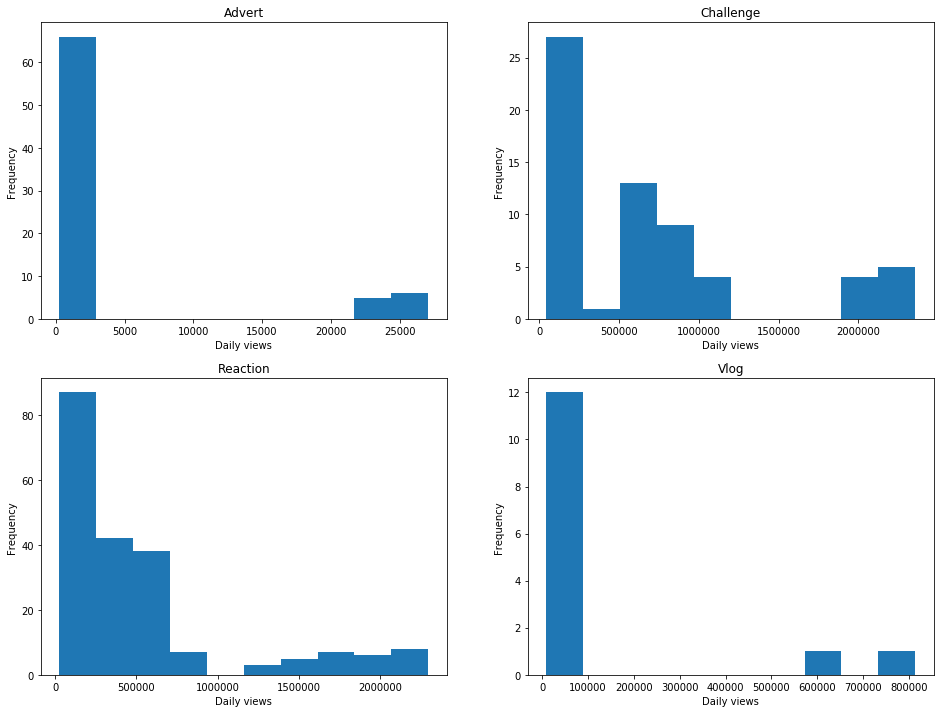

In [55]:
fig, ax = plt.subplots(figsize=(16,12), ncols=2, nrows=2)

# top left
ax[0,0].hist(feast[feast.category=='Advert']['views_change'])
ax[0,0].set_xlabel('Daily views')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('Advert')

# top right
ax[0,1].hist(feast[feast.category=='Challenge']['views_change'])
ax[0,1].set_xlabel('Daily views')
ax[0,1].set_ylabel('Frequency')
ax[0,1].set_title('Challenge')

# bottom left
ax[1,0].hist(feast[feast.category=='Reaction']['views_change'])
ax[1,0].set_xlabel('Daily views')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_title('Reaction')

# bottom right
ax[1,1].hist(feast[feast.category=='Vlog']['views_change'])
ax[1,1].set_xlabel('Daily views')
ax[1,1].set_ylabel('Frequency')
ax[1,1].set_title('Vlog')

plt.show()

# Hypothesis Test

We also saw during Activate how to perform a hypothesis test, a statistical tool that helps us determine whether a certain claim or hypothesis is supported by evidence from a sample of data.

In this demonstration we will perform a binomial test to evaluate a claim made by Mr Feast:

Mr Feast claims that only 15% of his videos fail to make 1000000 views after 14 days. Let's test his claim at the 5% level.

In [17]:
# Investigate how many videos after 14 days fail to make 1 million views

# First, select rows where the days_since_release is 14
fourteen_days=feast[feast.days_since_release==14]

# Store as an object
number_distinct_videos = fourteen_days['video_id'].nunique()

print(number_distinct_videos)
fourteen_days

16


,video_id,category,views,days_since_release,views_change
25,LL832,Reaction,3388124.0,14,593857.0
37,OD453,Vlog,813641.0,14,813641.0
111,FQ798,Advert,23772.0,14,269.0
122,MZ786,Advert,24024.0,14,448.0
126,CT573,Reaction,1731337.0,14,291558.0
138,NJ501,Reaction,4199030.0,14,48928.0
148,ZB519,Advert,28555.0,14,329.0
152,LA865,Challenge,3174630.0,14,702792.0
179,FV643,Reaction,2025703.0,14,2025703.0
204,AK102,Advert,26646.0,14,352.0


In [56]:
# Number of videos with <1  million views

num_vids_less_than_1mill_views = len(fourteen_days[fourteen_days['views'] < 1_000_000])

print(num_vids_less_than_1mill_views)

5


In [19]:
# We have data on 16 videos at their 14 day mark with 5 failing to meet the 1 million view mark 

print(num_vids_less_than_1mill_views / number_distinct_videos)

0.3125


This sample shows that the proportion is actually 31.25%, but is this sufficient evidence to reject Mr Feast's claim?

Null Hypothesis: Probability of a video failing to reach 1 million views after 14 days =0.15<br>
Alternate Hypothesis: Probability is greater (one tail test)

Test at 5% level

<i>Reminder</i>: With binom test we need to provide 4 inputs:

<ol>
    <li><b>x</b>: The number of successes</li>
    <li><b>n</b>: The number of trials</li>
    <li><b>p</b>: Probability of success (under the null hypothesis</li>
    <li><b>alternative</b>: One or two tailed test</li>
</ol>

In [20]:
from scipy.stats import binom_test

binom_test(5,16, p=0.15, alternative='greater')

0.07905129836694308

The p-value if 0.079, or 7.9%. As a reminder the p-value is the probability that results as extreme as the observed results might occur, assuming the null hypothesis is true.

In the context of this example:

Under the null hypothesis, the probability that at least 5/16 (31.25%) videos failing to reach 1 million views after 14 days is 7.9%. Although this is low, it is above 5% meaning we do not have enough evidence to doubt Mr Feast's claim.

<b>BUT</b>, what if Mr Feast's sample size had been bigger. Say it was 50 out of 160 videos...

In [21]:
binom_test(x=50, n=160, p=0.15, alternative='greater') 

1.7134618925220478e-07

Under the null hypothesis, the probability that at least 50/160 (31.25%) videos failing to reach 1 million views after 14 days is 0.000017%, much lower than 5%, meaning we have sufficient evidence to doubt Mr Feast's claim.

A hypothesis test is affected by the size of the data provided. Binomial tests should only be used with up to 50 data points, beyond that we should use something else. 

When conducting a hypothesis test, be aware that changing the size of the dataset will have an affecdt on the outcome.

## Practice

In [22]:
#1 Calculate the standard deviation of the days_since_released column for each category. 

feast.groupby('category')[['days_since_release']].std()

,days_since_release
category,
Advert,7.983536
Challenge,4.825262
Reaction,9.326702
Vlog,4.183300


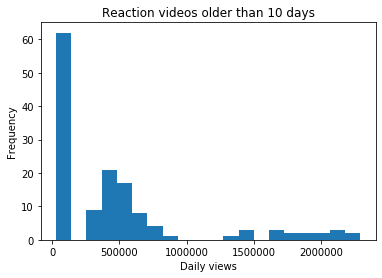

In [23]:
#2: What is the distribution of views_change for reaction videos that are older than 10 days?

reaction_vids_older_than_10_days=feast[(feast.category=='Reaction') & (feast.days_since_release>10)]
reaction_vids_older_than_10_days['views_change'].hist(bins = 20, grid=False)
plt.xlabel('Daily views')
plt.ylabel('Frequency')
plt.title('Reaction videos older than 10 days')
plt.show()

In [25]:
#3: What proportion of videos are adverts?

print( (feast.groupby('category').count()/len(feast)).loc['Advert']['views'] )

0.21568627450980393


In [28]:
feast.category.value_counts(normalize=True)

Reaction     0.568627
Advert       0.215686
Challenge    0.176471
Vlog         0.039216
Name: category, dtype: float64

In [26]:
#4: Mr Feast has claimed that only 10% of his videos are adverts. Test at the 5% level if this is true.


#Null ads make up 10% of videos
# Alt: ads are not 10% of videos

adverts = feast[feast.category == 'Advert']
print(len(adverts))
print(len(feast))
print(len(adverts) / len(feast))

77
357
0.21568627450980393


In [28]:
#Null ads make up 10% of videos
# Alt: ads are more than 10% of videos

binom_test(77, 357, p=0.10, alternative='greater')

9.003886808370132e-11

In [ ]:
# The p-value is less than 0.05
# We have evidence to reject the null hypothesis.